### [Class Attendance Model](dfgf)

In [1]:
# import the libraries
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Step 1: Data Preparation
train_dir = r"C:\Users\DELL LATITUDE E6430\Downloads\LASOP Students Images"  # Replace with your train dataset path
val_dir = r"C:\Users\DELL LATITUDE E6430\Downloads\LASOP Students Images"  # Replace with your validation dataset path

In [3]:
# Normalize image data
datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 93 images belonging to 31 classes.
Found 93 images belonging to 31 classes.


In [4]:
# Step 2: Load Pre-trained MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 10s 1us/step


In [5]:
# Step 3: Build a Simple Model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

In [6]:
# Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Step 5: Train the Model
model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10  # Fewer epochs for simplicity
)

C:\Users\DELL LATITUDE E6430\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 27s 8s/step - accuracy: 0.0161 - loss: 3.8300 - val_accuracy: 0.1935 - val_loss: 3.1847
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 6s/step - accuracy: 0.2132 - loss: 2.9833 - val_accuracy: 0.2903 - val_loss: 2.7549
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 6s/step - accuracy: 0.3068 - loss: 2.6850 - val_accuracy: 0.4839 - val_loss: 2.4117
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 0.4982 - loss: 2.3398 - val_accuracy: 0.6667 - val_loss: 2.0827
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 5s/step - accuracy: 0.7013 - loss: 2.0633 - val_accuracy: 0.7527 - val_loss: 1.7876
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 5s/step - accuracy: 0.7792 - loss: 1.6995 - val_accuracy: 0.8172 - val_loss: 1.5297
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 5s/step - accuracy: 0.8139 - loss: 1.4703 - val_accuracy: 0.8602 - val_loss: 1.3105
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 6s/step - accuracy: 0.8682 - loss: 1.3169 - val_accuracy: 0.8602 - val_loss: 1.1285
Epoch 9/

In [13]:
# import pltlib
import matplotlib.pyplot as plt 
import numpy as np
from tensorflow.keras.preprocessing import image

In [16]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    print("Actual: "+(image_path.split("/")[-1]).split("_")[0])
    #print("Predicted: "+classes[np.argmax(pred)])

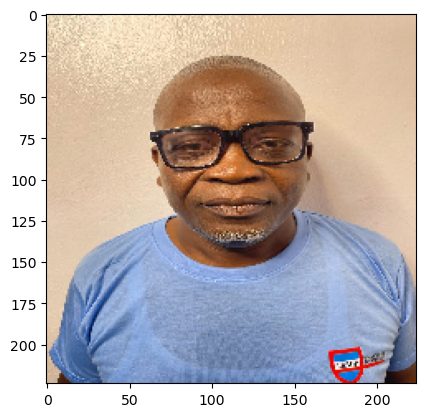

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Actual: C:\Users\DELL LATITUDE E6430\Downloads\LASOP Students Images\Bashir Akinwande Data Science\IMG-20250414-WA0015.jpg


In [17]:
predict_image(r"C:\Users\DELL LATITUDE E6430\Downloads\LASOP Students Images\Bashir Akinwande Data Science\IMG-20250414-WA0015.jpg")

In [18]:
# Save the model
model.save('simple_face_recognition_model.h5')

print("Simple model training complete and saved as 'simple_face_recognition_model.h5'")

Simple model training complete and saved as 'simple_face_recognition_model.h5'
